In [25]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

In [27]:
# Step 1: Pre-process the Documents
# Simple preprocessing - more can be done based on requirements
processed_documents = [doc.lower().replace('\n', ' ') for doc in corpus]

In [28]:
# Step 2: Vectorize the Documents using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(processed_documents)

In [29]:
# Step 3: Apply t-SNE
tsne = TSNE(n_components=3, random_state=0)
X_tsne = tsne.fit_transform(vectors.toarray())

In [30]:
def clust(mat, k):
    # Création de l'objet KMeans
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Ajustement du modèle et prédiction des clusters
    pred = kmeans.fit_predict(mat)
    
    return pred
    
# perform clustering
pred = clust(X_tsne, k)


/Users/zewei.lin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.41 
ARI: 0.23


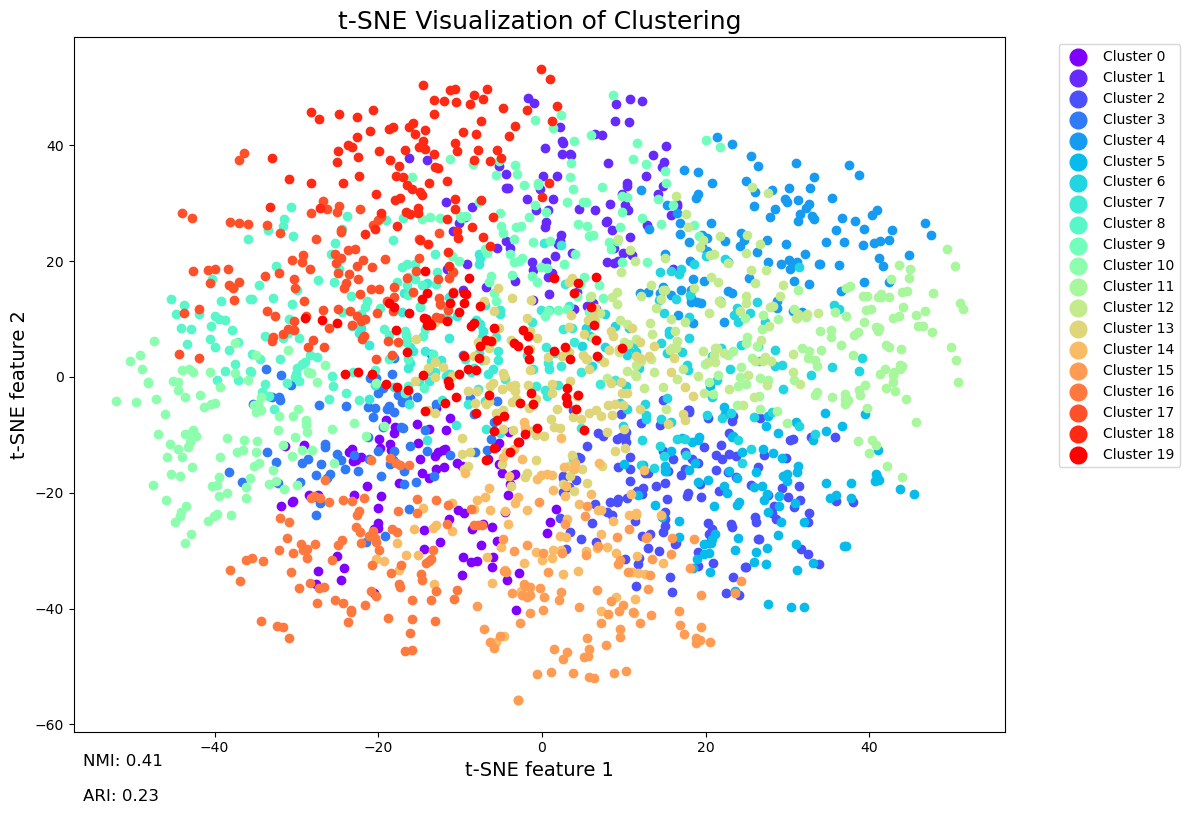

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))  


# choose the dimention for visualisation
x = X_tsne[:, 0]
y = X_tsne[:, 1]

# give each label the different color
unique_labels = np.unique(pred)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# plot the scatter
for i, label in enumerate(unique_labels):
    plt.scatter(x[pred == label], y[pred == label], color=colors[i], label=f'Cluster {label}')

"""plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE Visualization of Clustering')
plt.legend()
plt.show()"""

plt.xlabel('t-SNE feature 1', fontsize=14)
plt.ylabel('t-SNE feature 2', fontsize=14)
plt.title('t-SNE Visualization of Clustering', fontsize=18)
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot
plt.tight_layout()  # Adjust the padding between and around subplots

# Add NMI and ARI scores as text below the plot
plt.text(0.01, -0.05, f'NMI: {nmi_score:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.01, -0.1, f'ARI: {ari_score:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()